In [1]:
import numpy as np
import math, copy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame

In [3]:
dataset = pd.DataFrame(df)

In [4]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
# implementing feature scaling
def z_score_normalization(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    x_scaled = (x - mu)/sigma
    return x_scaled

# SINGLE FEATURE LINEAR REGRESSION FROM SCRATCH

In [6]:
x = dataset['MedInc'].values
y = dataset.iloc[:, -1].values

In [7]:
x_scaled = z_score_normalization(x)
x_scaled

array([ 2.34476576,  2.33223796,  1.7826994 , ..., -1.14259331,
       -1.05458292, -0.78012947], shape=(20640,))

In [8]:
y_scaled = z_score_normalization(y)
y_scaled

array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803], shape=(20640,))

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

In [10]:
# implementing the cost function
def compute_cost(X, y, w, b):
    """
    Compute Mean Squared Error cost function
    """
    m = len(X)
    predictions = w * X + b
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

In [11]:
# implement the gradient descent
def compute_gradients(X, y, w, b):
    """
    Compute gradients of cost w.r.t w and b
    """
    m = len(X)
    predictions = w * X + b
    error = predictions - y
    
    dj_dw = (1/m) * np.dot(error, X)   # derivative wrt w
    dj_db = (1/m) * np.sum(error)      # derivative wrt b
    
    return dj_dw, dj_db

In [12]:
# implementing gradient descent to fit w,b and alpha
def gradient_descent(X, y, w, b, alpha, num_iters):
    """
    Run gradient descent
    """
    cost_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradients(X, y, w, b)
        
        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        # Save cost for analysis
        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            cost_history.append(cost)
            print(f"Iteration {i}: Cost {cost:.4f}, w = {float(w):.4f}, b = {b:.4f}")
    
    return w, b, cost_history

In [13]:
# passing in the values
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1e-3
w_final, b_final, cost_history = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations)
print(f"Final parameters: w = {w_final:.4f}, b = {b_final:.4f}")
print(f"Final cost: {cost_history[-1]:.4f}")

Iteration 0: Cost 0.5015, w = 0.0007, b = 0.0000
Iteration 100: Cost 0.4580, w = 0.0667, b = 0.0003
Iteration 200: Cost 0.4224, w = 0.1263, b = 0.0005
Iteration 300: Cost 0.3933, w = 0.1802, b = 0.0006
Iteration 400: Cost 0.3695, w = 0.2290, b = 0.0007
Iteration 500: Cost 0.3500, w = 0.2732, b = 0.0008
Iteration 600: Cost 0.3341, w = 0.3131, b = 0.0009
Iteration 700: Cost 0.3210, w = 0.3491, b = 0.0009
Iteration 800: Cost 0.3104, w = 0.3818, b = 0.0009
Iteration 900: Cost 0.3017, w = 0.4113, b = 0.0009
Iteration 1000: Cost 0.2945, w = 0.4380, b = 0.0009
Iteration 1100: Cost 0.2887, w = 0.4621, b = 0.0009
Iteration 1200: Cost 0.2839, w = 0.4839, b = 0.0008
Iteration 1300: Cost 0.2800, w = 0.5037, b = 0.0008
Iteration 1400: Cost 0.2769, w = 0.5215, b = 0.0007
Iteration 1500: Cost 0.2742, w = 0.5377, b = 0.0007
Iteration 1600: Cost 0.2721, w = 0.5523, b = 0.0006
Iteration 1700: Cost 0.2704, w = 0.5655, b = 0.0005
Iteration 1800: Cost 0.2689, w = 0.5774, b = 0.0005
Iteration 1900: Cost 0.2

In [14]:
y_pred = np.dot(w_final, x_test) + b_final
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 0.5325482995582718
RMSE: 0.7297590695279311
MAE: 0.5458837321666072
R² Score: 0.45885989804740757


In [15]:
import matplotlib.pyplot as plt

In [16]:
def plot_single_feature(x_test, y_test, w, b):
    """
    Plot regression line for single feature linear regression.
    X_train: (m,) or (m,1)
    y_train: (m,)
    w, b: model parameters
    """
    plt.figure(figsize=(8,6))
    
    # Scatter plot of training data
    plt.scatter(x_test, y_test, color="blue", alpha=0.5, label="Test data")
    
    # Regression line
    x_vals = np.linspace(x_test.min(), x_test.max(), 100)
    y_vals = w * x_vals + b
    plt.plot(x_vals, y_vals, color="red", linewidth=3, label="Regression line")
    
    plt.xlabel("Median Income (MedInc)")
    plt.ylabel("Median House Value (MedHouseVal)")
    plt.title("Single Feature Linear Regression (MedInc → MedHouseVal)")
    plt.legend()
    plt.savefig('Linear_regression_train_adaptation_single_features.png')
    plt.show()

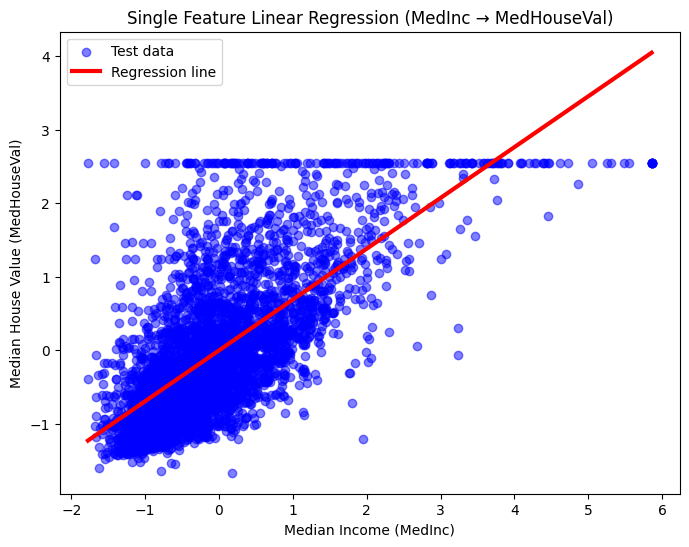

In [17]:
plot_single_feature(x_test, y_test, w_final, b_final)

In [18]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 0.5325489973101193
RMSE: 0.7297595475977818
MAE: 0.5458820148457625
R² Score: 0.45885918903846656


In [20]:
w = lin_reg.coef_
b = lin_reg.intercept_
print(f"SCIKIT-LEARN PARAMETERS: W: {w}, B: {b}")

SCIKIT-LEARN PARAMETERS: W: [0.69038011], B: -0.0007275396393188324


In [21]:
import numpy as np

def ols_from_scratch(X, y):
    """
    Implements Ordinary Least Squares (OLS) regression from scratch.

    Args:
        X (np.array): Independent variables (features).
        y (np.array): Dependent variable (target).

    Returns:
        np.array: Array of OLS coefficients (including intercept).
    """
    # Add a column of ones to X for the intercept term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Calculate coefficients using the normal equation
    # beta = (X_b.T @ X_b)^-1 @ X_b.T @ y
    try:
        coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    except np.linalg.LinAlgError:
        print("Singular matrix: Cannot compute inverse. Check for multicollinearity or insufficient data.")
        return None
    return coefficients

# Calculate coefficients
beta_scratch = ols_from_scratch(x_train, y_train)

if beta_scratch is not None:
    print(f"Intercept (beta_0): {beta_scratch[0]:.2f}")
    print(f"Coefficient for X (beta_1): {beta_scratch[1]:.2f}")

    # Make a prediction
    new_X = x_test
    new_X_b = np.c_[np.ones((new_X.shape[0], 1)), new_X]
    print(beta_scratch)
    predicted_y = new_X_b @ beta_scratch
    print(f"Prediction for X=6: {predicted_y[0]:.2f}")

Intercept (beta_0): -0.00
Coefficient for X (beta_1): 0.69
[-0.00072754  0.69038011]
Prediction for X=6: -0.80


# MULTIPLE FEATURES LINEAR REGRESSION FROM SCRATCH

In [22]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [23]:
x_scaled = z_score_normalization(x)
y_scaled = z_score_normalization(y)
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

In [24]:
w = np.zeros(x_train_multi.shape[1])
w

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
b_init_multi = 0.0
w_init_multi = np.zeros(x_train_multi.shape[1])
print(f"w_init shape: {w_init_multi.shape}, b_init type: {type(b_init_multi)}")

w_init shape: (8,), b_init type: <class 'float'>


In [26]:
def compute_cost_multi(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [27]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost_multi(x_train_multi, y_train_multi, w_init_multi, b_init_multi)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 0.501967404257205


In [28]:
def compute_gradients_multi(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X : (ndarray Shape (m,n)) matrix of examples 
      y : (ndarray Shape (m,))  target value of each example
      w : (ndarray Shape (n,))  parameters of the model      
      b : (scalar)              parameter of the model      
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i,j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw/m                                
    dj_db = dj_db/m                                
        
    return dj_db,dj_dw

In [29]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradients_multi(x_train_multi, y_train_multi, w_init_multi, b_init_multi)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -0.002936723686846766
dj_dw at initial w,b: 
 [-0.69364145 -0.10404167 -0.15323133  0.04703302  0.02618657  0.02460037
  0.14329519  0.04650713]


In [30]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [31]:
# some gradient descent settings
iterations = 20000
alpha = 1e-3
# run gradient descent 
w_final_multi, b_final_multi, J_hist_multi = gradient_descent(x_train_multi, y_train_multi, w_init_multi, b_init_multi,
                                                    compute_cost_multi, compute_gradients_multi, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final_multi:0.9f},{w_final_multi} ")
m,_ = x_train_multi.shape
y_pred_summary = []
for i in range(m):
    y_pred = np.dot(x_train_multi[i], w_final_multi) + b_final_multi
    print(f"prediction: {y_pred}, target value: {y_train_multi[i]}")
    y_pred_dict = {"Predicted Values":y_pred, "Target Values":y_train_multi[i]}
    y_pred_summary.append(y_pred_dict)

Iteration    0: Cost     0.50   
Iteration 2000: Cost     0.24   
Iteration 4000: Cost     0.22   
Iteration 6000: Cost     0.22   
Iteration 8000: Cost     0.21   
Iteration 10000: Cost     0.21   
Iteration 12000: Cost     0.20   
Iteration 14000: Cost     0.20   
Iteration 16000: Cost     0.20   
Iteration 18000: Cost     0.20   
b,w found by gradient descent: -0.000453483,[ 0.73565277  0.13027069 -0.21135047  0.2507777   0.00622564 -0.03363745
 -0.59386059 -0.56740728] 
prediction: -0.10865296686504641, target value: -0.9000197459876317
prediction: 0.3620613474988824, target value: 1.518674926891938
prediction: 0.30388818777235643, target value: -0.2968626365916517
prediction: -0.4640508879779944, target value: -0.9832138300422495
prediction: -0.28073820709930586, target value: -0.9563490737329461
prediction: 1.013870131151618, target value: 0.5021472123495749
prediction: -0.4616503385750876, target value: -0.429453208053699
prediction: 1.7571761537070114, target value: 2.540410937

In [32]:
df = pd.DataFrame(y_pred_summary)
df

,Predicted Values,Target Values
0,-0.108653,-0.900020
1,0.362061,1.518675
2,0.303888,-0.296863
3,-0.464051,-0.983214
4,-0.280738,-0.956349
...,...,...
16507,0.938134,0.193636
16508,-0.463363,-0.945083
16509,-0.063185,0.132107
16510,0.613319,0.664202


In [33]:
def plot_predicted_vs_actual(y_true, y_pred, title="Multiple Features Regression"):
    """
    Plot predicted vs actual values for multiple regression.
    """
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, alpha=0.5, color="green")
    
    # Reference line y=x
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2, label="Ideal: y = x")
    
    plt.xlabel("Actual Median House Value")
    plt.ylabel("Predicted Median House Value")
    plt.title(title)
    plt.legend()
    plt.savefig('Linear_regression_train_adaptation_multiple_features.png')
    plt.show()

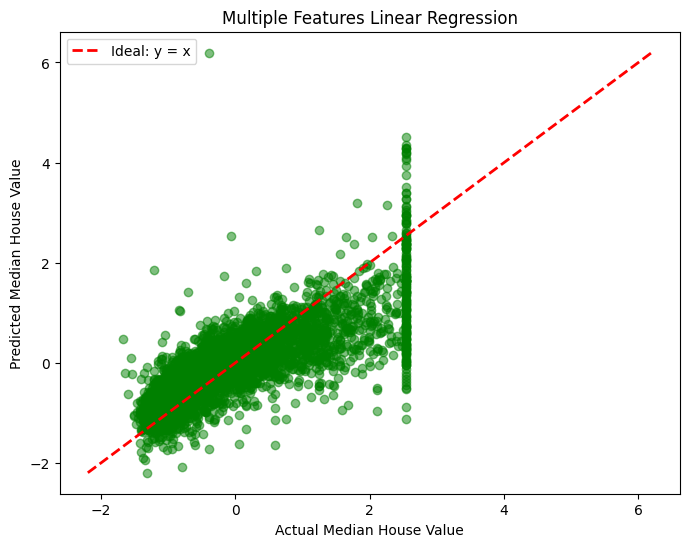

In [34]:
y_pred_multi = x_test_multi.dot(w_final_multi) + b_final_multi
plot_predicted_vs_actual(y_test_multi, y_pred_multi, title="Multiple Features Linear Regression")

In [38]:
y_pred_multi = x_test_multi.dot(w_final_multi) + b_final_multi
mse = mean_squared_error(y_test_multi, y_pred_multi)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_multi, y_pred_multi)
r2 = r2_score(y_test_multi, y_pred_multi)
print(y_pred_multi)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

[-1.1000206  -0.31278082  0.47631686 ...  2.04112746 -0.65488459
 -0.10271397]
MSE: 0.4157680854654333
RMSE: 0.6448008106891874
MAE: 0.4641163894675058
R² Score: 0.5775241713399175


In [65]:
def ols_from_scratch_multi(X, y):
    """
    Implements Ordinary Least Squares (OLS) regression from scratch.

    Args:
        X (np.array): Independent variables (features).
        y (np.array): Dependent variable (target).

    Returns:
        np.array: Array of OLS coefficients (including intercept).
    """
    # Add a column of ones to X for the intercept term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Calculate coefficients using the normal equation
    # beta = (X_b.T @ X_b)^-1 @ X_b.T @ y
    try:
        coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    except np.linalg.LinAlgError:
        print("Singular matrix: Cannot compute inverse. Check for multicollinearity or insufficient data.")
        return None
    return coefficients

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train_multi, y_train_multi)
y_pred_multi = reg.predict(x_test_multi)
print(y_pred_multi)
mse = mean_squared_error(y_test_multi, y_pred_multi)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_multi, y_pred_multi)
r2 = r2_score(y_test_multi, y_pred_multi)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

w = reg.coef_
b = reg.intercept_
print(f"SCIKIT-LEARN PARAMETERS: W: {w}, B: {b}")

[-1.16942746 -0.26391728  0.55558107 ...  2.08003582 -0.76351976
 -0.05126459]
MSE: 0.41747698052495014
RMSE: 0.6461245859158666
MAE: 0.46207392160821775
R² Score: 0.575787706032451
SCIKIT-LEARN PARAMETERS: W: [ 0.73867827  0.10605706 -0.26441499  0.32162476 -0.00199182 -0.03173822
 -0.77702845 -0.75301636], B: -0.0006030354213706728
